# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

As the demand for professionals among different industries is rising, getting a reasonable compensation for the work you do at a company is a need for every job seekers. However, salary that ones get tend to vary from many factors such as experiences, education, previous job title, etc. Knowing your value in the market allows more room for salary negotiation. This project is to build a model that predict salary that can be deployed in business or as individual use. 

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline


# My information
__author__ = " Cho_Hang"
__email__ = "joench1993@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [4]:
!ls -lh data/

total 269304
-rwxr-xr-x@ 1 ngjo  staff    56M Oct  8  2016 test_features.csv
-rwxr-xr-x@ 1 ngjo  staff    56M Oct  8  2016 train_features.csv
-rwxr-xr-x@ 1 ngjo  staff    20M Oct  8  2016 train_salaries.csv


In [5]:
train_fea = pd.read_csv('data/train_features.csv')
train_salary = pd.read_csv('data/train_salaries.csv')

In [6]:
train_fea.shape

(1000000, 8)

In [7]:
train_salary.shape

(1000000, 2)

### ---- 3 Inspect and clean the data ----

In [8]:
train_fea.isnull().any()

jobId                  False
companyId              False
jobType                False
degree                 False
major                  False
industry               False
yearsExperience        False
milesFromMetropolis    False
dtype: bool

In [9]:
train_salary.isnull().any()

jobId     False
salary    False
dtype: bool

In [10]:
train_fea.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [11]:
train_salary.dtypes

jobId     object
salary     int64
dtype: object

In [12]:
# Merging the dataset train_salary and train_fea
train_merged = pd.merge(train_fea,train_salary, how='left', on='jobId')

In [13]:
# Look for duplicated values.
train_merged.duplicated().any()

False

After some preprocessing and dataset, the merged training dataset looks clean.

### ---- 4 Explore the data (EDA) ----

In [18]:
train_merged.shape

(1000000, 9)

In [19]:
train_merged.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [26]:
#inspect the new merged dataset
train_merged.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116061.818000
std,7.212391,28.877733,38717.936381
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88000.000000
50%,12.000000,50.000000,114000.000000
75%,18.000000,75.000000,141000.000000
max,24.000000,99.000000,301000.000000


In [21]:
# Check if every record are unique
train_merged.jobId.nunique() == len(train_merged)

True

In [25]:
# The salary column should be recorded in thousand, so I muliplied the whole columns by 1000.
train_merged['salary'] = train_merged['salary']*1000

(array([5.00000e+00, 2.44700e+03, 1.88630e+04, 4.66860e+04, 8.13050e+04,
        1.18643e+05, 1.46773e+05, 1.53004e+05, 1.37725e+05, 1.08907e+05,
        7.73940e+04, 5.02090e+04, 2.93930e+04, 1.58530e+04, 7.58900e+03,
        3.41800e+03, 1.27000e+03, 3.87000e+02, 1.09000e+02, 2.00000e+01]),
 array([     0.,  15050.,  30100.,  45150.,  60200.,  75250.,  90300.,
        105350., 120400., 135450., 150500., 165550., 180600., 195650.,
        210700., 225750., 240800., 255850., 270900., 285950., 301000.]),
 <a list of 20 Patch objects>)

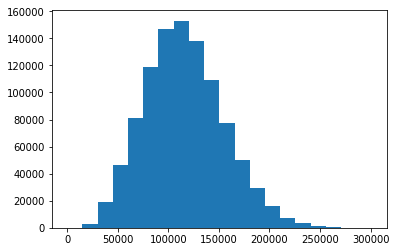

In [61]:
# Check the distribution of the target variable. 
plt.hist(train_merged['salary'],20)

In [46]:
# Draw 10% sample from the original dataset for fasting training and ensure a more normally distributed target variable
train_subset = train_merged.sample(n=100000,replace = True)

Text(0.5, 1.0, 'Histogram of salary')

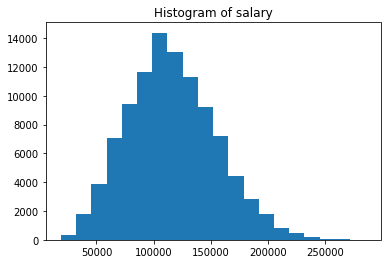

In [62]:
# Salary distribution from the subset
plt.hist(train_subset['salary'],20)
plt.title('Histogram of salary')

In [72]:
jobtype_group = train_subset.groupby('jobType')
jobtype_group.mean()

,yearsExperience,milesFromMetropolis,salary
jobType,,,
CEO,11.992559,49.248760,145292.206753
CFO,11.953071,49.744534,135017.858573
CTO,11.998406,49.792188,135192.586688
JANITOR,11.931617,49.031033,70820.198989
JUNIOR,12.057164,49.219866,95589.292913
MANAGER,12.048330,49.294396,115659.441233
SENIOR,12.220427,49.602175,105865.952171
VICE_PRESIDENT,11.970910,49.686033,125629.299261


In [80]:
degree_group = train_subset.groupby('degree')
degree_group.mean()

,yearsExperience,milesFromMetropolis,salary
degree,,,
BACHELORS,12.081712,49.227789,126052.610556
DOCTORAL,12.080102,49.929825,135454.005078
HIGH_SCHOOL,11.991814,49.326868,102028.043661
MASTERS,11.993413,49.505849,130452.129472
NONE,11.984442,49.354134,97993.844078


In [83]:
industry_group = train_subset.groupby('industry')
industry_group.mean()

,yearsExperience,milesFromMetropolis,salary
industry,,,
AUTO,12.070644,49.404394,109992.907801
EDUCATION,12.032676,49.325716,99509.440535
FINANCE,12.078958,49.700966,130698.936021
HEALTH,11.934749,49.401107,115171.012055
OIL,12.116478,49.209233,131799.957256
SERVICE,11.956785,49.452562,104012.950450
WEB,11.961081,49.663763,121624.153187


In [84]:
major_group = train_subset.groupby('major')
major_group.mean()

,yearsExperience,milesFromMetropolis,salary
major,,,
BIOLOGY,12.184954,49.524768,128439.729501
BUSINESS,11.959292,49.427516,135528.512539
CHEMISTRY,11.991081,49.665180,128393.996569
COMPSCI,11.963444,49.724879,132128.898129
ENGINEERING,12.113421,49.708587,138574.881677
LITERATURE,12.048768,49.520306,124047.408666
MATH,12.097205,49.154487,133952.091651
NONE,11.989777,49.393469,102572.299439
PHYSICS,12.099032,49.418424,131004.666436


,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.001635,0.374321
milesFromMetropolis,0.001635,1.000000,-0.291096
salary,0.374321,-0.291096,1.000000


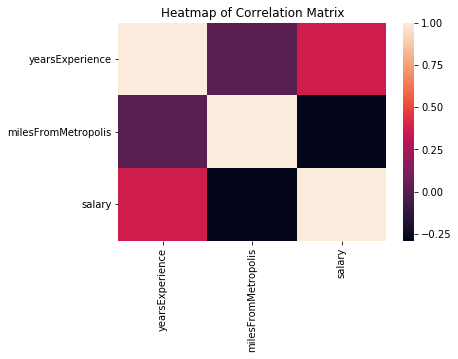

In [85]:
#look for correlation between each feature and the target
corr = train_subset.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Text(0, 0.5, 'Count')

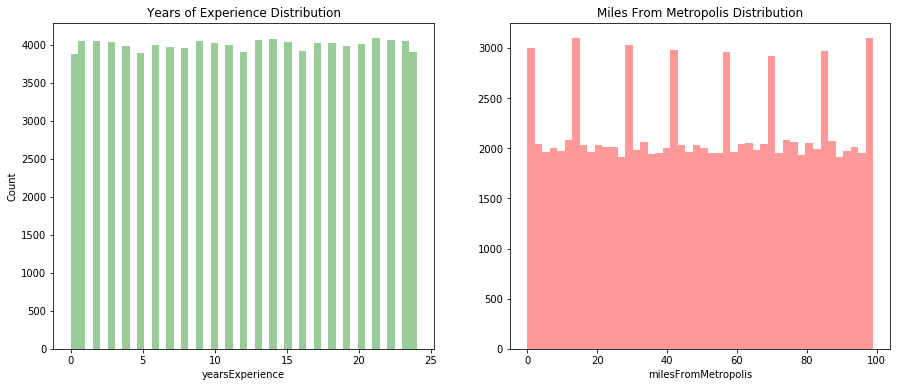

In [96]:
# Check distribution for years of experience
f, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.distplot(train_subset.yearsExperience, kde=False, color="g", ax=axes[0]).set_title('Years of Experience Distribution')
axes[0].set_ylabel('Count')

sns.distplot(train_subset.milesFromMetropolis, kde=False, color="r", ax=axes[1]).set_title('Miles From Metropolis Distribution')
axes[0].set_ylabel('Count')


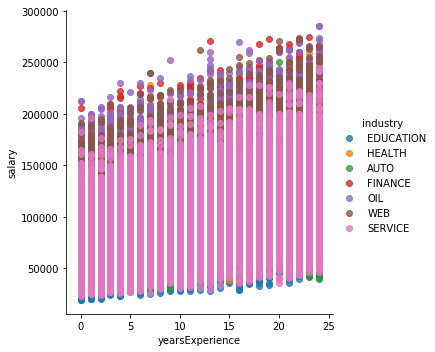

In [101]:
sns.lmplot(x='yearsExperience', y='salary', data=train_subset,
           fit_reg=False, # No regression line
           hue='industry')   

In [22]:
#summarize each feature variable

a

### ---- 5 Establish a baseline ----

In [5]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [15]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data